## 广东2022年7月清洁与污染个例
## `GZ_2207 Clean & Pollute`

---
*@author: Evan*\
*@date: 2022-08-30*

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import os

In [2]:
# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 允许显示中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

## 读取数据

In [4]:
paFile1=nc.Dataset('F:/Data/caseGZ_2207/PA/CCTM_PA_1_v533_intel_CN3GD_152X110_20220715.nc')
print('paFile',paFile1.variables.keys())
print(paFile1.variables['HADV_O3'].shape)

paFile dict_keys(['TFLAG', 'HADV_O3', 'ZADV_O3', 'HDIF_O3', 'VDIF_O3', 'EMIS_O3', 'DDEP_O3', 'CLDS_O3', 'CHEM_O3', 'AERO_O3', 'HADV_NO2', 'ZADV_NO2', 'HDIF_NO2', 'VDIF_NO2', 'EMIS_NO2', 'DDEP_NO2', 'CLDS_NO2', 'CHEM_NO2', 'AERO_NO2', 'HADV_NO', 'ZADV_NO', 'HDIF_NO', 'VDIF_NO', 'EMIS_NO', 'DDEP_NO', 'CLDS_NO', 'CHEM_NO', 'AERO_NO'])
(24, 38, 110, 152)


In [5]:
# loop to read pa data
path='F:/Data/caseGZ_2207/PA/'
files=os.listdir(path)
HADV=np.empty(shape=(0,38,110,152))
ZADV=np.empty(shape=(0,38,110,152))
HDIF=np.empty(shape=(0,38,110,152))
VDIF=np.empty(shape=(0,38,110,152))
EMIS=np.empty(shape=(0,38,110,152))
DDEP=np.empty(shape=(0,38,110,152))
CLDS=np.empty(shape=(0,38,110,152))
CHEM=np.empty(shape=(0,38,110,152))
AERO=np.empty(shape=(0,38,110,152))

for file in files:
    pa=nc.Dataset(path+file)
    HADVi=pa.variables['HADV_O3'][:]
    ZADVi=pa.variables['ZADV_O3'][:]
    HDIFi=pa.variables['HDIF_O3'][:]
    VDIFi=pa.variables['VDIF_O3'][:]
    EMISi=pa.variables['EMIS_O3'][:]
    DDEPi=pa.variables['DDEP_O3'][:]
    CLDSi=pa.variables['CLDS_O3'][:]
    CHEMi=pa.variables['CHEM_O3'][:]
    AEROi=pa.variables['AERO_O3'][:]
    
    HADV=np.concatenate((HADV,HADVi),axis=0)
    ZADV=np.concatenate((ZADV,ZADVi),axis=0)
    HDIF=np.concatenate((HDIF,HDIFi),axis=0)
    VDIF=np.concatenate((VDIF,VDIFi),axis=0)
    EMIS=np.concatenate((EMIS,EMISi),axis=0)
    DDEP=np.concatenate((DDEP,DDEPi),axis=0)
    CLDS=np.concatenate((CLDS,CLDSi),axis=0)
    CHEM=np.concatenate((CHEM,CHEMi),axis=0)
    AERO=np.concatenate((AERO,AEROi),axis=0)

print(HADV.shape)


(360, 38, 110, 152)


---
## for pic 1

In [6]:
tstart=16
tend=352 #360-8

# 1000hPa
HADV_L1=np.squeeze(HADV[tstart:tend,1,:,:])*48/22.4*1000
ZADV_L1=np.squeeze(ZADV[tstart:tend,1,:,:])*48/22.4*1000
HDIF_L1=np.squeeze(HDIF[tstart:tend,1,:,:])*48/22.4*1000
VDIF_L1=np.squeeze(VDIF[tstart:tend,1,:,:])*48/22.4*1000
EMIS_L1=np.squeeze(EMIS[tstart:tend,1,:,:])*48/22.4*1000
DDEP_L1=np.squeeze(DDEP[tstart:tend,1,:,:])*48/22.4*1000
CLDS_L1=np.squeeze(CLDS[tstart:tend,1,:,:])*48/22.4*1000
CHEM_L1=np.squeeze(CHEM[tstart:tend,1,:,:])*48/22.4*1000
AERO_L1=np.squeeze(AERO[tstart:tend,1,:,:])*48/22.4*1000

# 850hPa
HADV_L2=np.squeeze(HADV[tstart:tend,18,:,:])*48/22.4*1000
ZADV_L2=np.squeeze(ZADV[tstart:tend,18,:,:])*48/22.4*1000
HDIF_L2=np.squeeze(HDIF[tstart:tend,18,:,:])*48/22.4*1000
VDIF_L2=np.squeeze(VDIF[tstart:tend,18,:,:])*48/22.4*1000
EMIS_L2=np.squeeze(EMIS[tstart:tend,18,:,:])*48/22.4*1000
DDEP_L2=np.squeeze(DDEP[tstart:tend,18,:,:])*48/22.4*1000
CLDS_L2=np.squeeze(CLDS[tstart:tend,18,:,:])*48/22.4*1000
CHEM_L2=np.squeeze(CHEM[tstart:tend,18,:,:])*48/22.4*1000
AERO_L2=np.squeeze(AERO[tstart:tend,18,:,:])*48/22.4*1000

print('whole =',HADV_L1.shape)

whole = (336, 110, 152)


In [169]:
# Guangzhou
slon=71
elon=73
slat=56
elat=59

HADV_gz=np.squeeze(np.mean(HADV_L1[:,:,slon:elon],2))
HADV_gz=np.squeeze(np.mean(HADV_gz[:,slat:elat],1))
ZADV_gz=np.squeeze(np.mean(ZADV_L1[:,:,slon:elon],2))
ZADV_gz=np.squeeze(np.mean(ZADV_gz[:,slat:elat],1))
HDIF_gz=np.squeeze(np.mean(HDIF_L1[:,:,slon:elon],2))
HDIF_gz=np.squeeze(np.mean(HDIF_gz[:,slat:elat],1))
VDIF_gz=np.squeeze(np.mean(VDIF_L1[:,:,slon:elon],2))
VDIF_gz=np.squeeze(np.mean(VDIF_gz[:,slat:elat],1))
EMIS_gz=np.squeeze(np.mean(EMIS_L1[:,:,slon:elon],2))
EMIS_gz=np.squeeze(np.mean(EMIS_gz[:,slat:elat],1))
DDEP_gz=np.squeeze(np.mean(DDEP_L1[:,:,slon:elon],2))
DDEP_gz=np.squeeze(np.mean(DDEP_gz[:,slat:elat],1))
CLDS_gz=np.squeeze(np.mean(CLDS_L1[:,:,slon:elon],2))
CLDS_gz=np.squeeze(np.mean(CLDS_gz[:,slat:elat],1))
CHEM_gz=np.squeeze(np.mean(CHEM_L1[:,:,slon:elon],2))
CHEM_gz=np.squeeze(np.mean(CHEM_gz[:,slat:elat],1))
AERO_gz=np.squeeze(np.mean(AERO_L1[:,:,slon:elon],2))
AERO_gz=np.squeeze(np.mean(AERO_gz[:,slat:elat],1))

HADV_gzL2=np.squeeze(np.mean(HADV_L2[:,:,slon:elon],2))
HADV_gzL2=np.squeeze(np.mean(HADV_gzL2[:,slat:elat],1))
ZADV_gzL2=np.squeeze(np.mean(ZADV_L2[:,:,slon:elon],2))
ZADV_gzL2=np.squeeze(np.mean(ZADV_gzL2[:,slat:elat],1))
HDIF_gzL2=np.squeeze(np.mean(HDIF_L2[:,:,slon:elon],2))
HDIF_gzL2=np.squeeze(np.mean(HDIF_gzL2[:,slat:elat],1))
VDIF_gzL2=np.squeeze(np.mean(VDIF_L2[:,:,slon:elon],2))
VDIF_gzL2=np.squeeze(np.mean(VDIF_gzL2[:,slat:elat],1))
EMIS_gzL2=np.squeeze(np.mean(EMIS_L2[:,:,slon:elon],2))
EMIS_gzL2=np.squeeze(np.mean(EMIS_gzL2[:,slat:elat],1))
DDEP_gzL2=np.squeeze(np.mean(DDEP_L2[:,:,slon:elon],2))
DDEP_gzL2=np.squeeze(np.mean(DDEP_gzL2[:,slat:elat],1))
CLDS_gzL2=np.squeeze(np.mean(CLDS_L2[:,:,slon:elon],2))
CLDS_gzL2=np.squeeze(np.mean(CLDS_gzL2[:,slat:elat],1))
CHEM_gzL2=np.squeeze(np.mean(CHEM_L2[:,:,slon:elon],2))
CHEM_gzL2=np.squeeze(np.mean(CHEM_gzL2[:,slat:elat],1))
AERO_gzL2=np.squeeze(np.mean(AERO_L2[:,:,slon:elon],2))
AERO_gzL2=np.squeeze(np.mean(AERO_gzL2[:,slat:elat],1))

print('gzL1 = ',HADV_gz.shape)
print('gzL2 = ',HADV_gzL2.shape)

gzL1 =  (336,)
gzL2 =  (336,)


---
## for pic 2

In [170]:
# clean week
tstart=16
tend=184 #192-8

# 1000hPa
HADVc_L1=np.squeeze(HADV[tstart:tend,1,:,:])*48/22.4*1000
ZADVc_L1=np.squeeze(ZADV[tstart:tend,1,:,:])*48/22.4*1000
HDIFc_L1=np.squeeze(HDIF[tstart:tend,1,:,:])*48/22.4*1000
VDIFc_L1=np.squeeze(VDIF[tstart:tend,1,:,:])*48/22.4*1000
EMISc_L1=np.squeeze(EMIS[tstart:tend,1,:,:])*48/22.4*1000
DDEPc_L1=np.squeeze(DDEP[tstart:tend,1,:,:])*48/22.4*1000
CLDSc_L1=np.squeeze(CLDS[tstart:tend,1,:,:])*48/22.4*1000
CHEMc_L1=np.squeeze(CHEM[tstart:tend,1,:,:])*48/22.4*1000
AEROc_L1=np.squeeze(AERO[tstart:tend,1,:,:])*48/22.4*1000

# 850hPa
HADVc_L2=np.squeeze(HADV[tstart:tend,18,:,:])*48/22.4*1000
ZADVc_L2=np.squeeze(ZADV[tstart:tend,18,:,:])*48/22.4*1000
HDIFc_L2=np.squeeze(HDIF[tstart:tend,18,:,:])*48/22.4*1000
VDIFc_L2=np.squeeze(VDIF[tstart:tend,18,:,:])*48/22.4*1000
EMISc_L2=np.squeeze(EMIS[tstart:tend,18,:,:])*48/22.4*1000
DDEPc_L2=np.squeeze(DDEP[tstart:tend,18,:,:])*48/22.4*1000
CLDSc_L2=np.squeeze(CLDS[tstart:tend,18,:,:])*48/22.4*1000
CHEMc_L2=np.squeeze(CHEM[tstart:tend,18,:,:])*48/22.4*1000
AEROc_L2=np.squeeze(AERO[tstart:tend,18,:,:])*48/22.4*1000

# pollute week
tstart=184
tend=352 #360-8

# 1000hPa
HADVp_L1=np.squeeze(HADV[tstart:tend,1,:,:])*48/22.4*1000
ZADVp_L1=np.squeeze(ZADV[tstart:tend,1,:,:])*48/22.4*1000
HDIFp_L1=np.squeeze(HDIF[tstart:tend,1,:,:])*48/22.4*1000
VDIFp_L1=np.squeeze(VDIF[tstart:tend,1,:,:])*48/22.4*1000
EMISp_L1=np.squeeze(EMIS[tstart:tend,1,:,:])*48/22.4*1000
DDEPp_L1=np.squeeze(DDEP[tstart:tend,1,:,:])*48/22.4*1000
CLDSp_L1=np.squeeze(CLDS[tstart:tend,1,:,:])*48/22.4*1000
CHEMp_L1=np.squeeze(CHEM[tstart:tend,1,:,:])*48/22.4*1000
AEROp_L1=np.squeeze(AERO[tstart:tend,1,:,:])*48/22.4*1000

# 850hPa
HADVp_L2=np.squeeze(HADV[tstart:tend,18,:,:])*48/22.4*1000
ZADVp_L2=np.squeeze(ZADV[tstart:tend,18,:,:])*48/22.4*1000
HDIFp_L2=np.squeeze(HDIF[tstart:tend,18,:,:])*48/22.4*1000
VDIFp_L2=np.squeeze(VDIF[tstart:tend,18,:,:])*48/22.4*1000
EMISp_L2=np.squeeze(EMIS[tstart:tend,18,:,:])*48/22.4*1000
DDEPp_L2=np.squeeze(DDEP[tstart:tend,18,:,:])*48/22.4*1000
CLDSp_L2=np.squeeze(CLDS[tstart:tend,18,:,:])*48/22.4*1000
CHEMp_L2=np.squeeze(CHEM[tstart:tend,18,:,:])*48/22.4*1000
AEROp_L2=np.squeeze(AERO[tstart:tend,18,:,:])*48/22.4*1000

print('clean   =',HADVc_L1.shape)
print('pollute =',HADVp_L1.shape)

clean   = (168, 110, 152)
pollute = (168, 110, 152)


In [171]:
# clean and pollute week
HADVc_gz=np.squeeze(np.mean(HADVc_L1[:,:,slon:elon],2))
HADVc_gz=np.squeeze(np.mean(HADVc_gz[:,slat:elat],1))
HADVc_gz=np.squeeze(np.mean(HADVc_gz[:]))
ZADVc_gz=np.squeeze(np.mean(ZADVc_L1[:,:,slon:elon],2))
ZADVc_gz=np.squeeze(np.mean(ZADVc_gz[:,slat:elat],1))
ZADVc_gz=np.squeeze(np.mean(ZADVc_gz[:]))
HDIFc_gz=np.squeeze(np.mean(HDIFc_L1[:,:,slon:elon],2))
HDIFc_gz=np.squeeze(np.mean(HDIFc_gz[:,slat:elat],1))
HDIFc_gz=np.squeeze(np.mean(HDIFc_gz[:]))
VDIFc_gz=np.squeeze(np.mean(VDIFc_L1[:,:,slon:elon],2))
VDIFc_gz=np.squeeze(np.mean(VDIFc_gz[:,slat:elat],1))
VDIFc_gz=np.squeeze(np.mean(VDIFc_gz[:]))
EMISc_gz=np.squeeze(np.mean(EMISc_L1[:,:,slon:elon],2))
EMISc_gz=np.squeeze(np.mean(EMISc_gz[:,slat:elat],1))
EMISc_gz=np.squeeze(np.mean(EMISc_gz[:]))
DDEPc_gz=np.squeeze(np.mean(DDEPc_L1[:,:,slon:elon],2))
DDEPc_gz=np.squeeze(np.mean(DDEPc_gz[:,slat:elat],1))
DDEPc_gz=np.squeeze(np.mean(DDEPc_gz[:]))
CLDSc_gz=np.squeeze(np.mean(CLDSc_L1[:,:,slon:elon],2))
CLDSc_gz=np.squeeze(np.mean(CLDSc_gz[:,slat:elat],1))
CLDSc_gz=np.squeeze(np.mean(CLDSc_gz[:]))
CHEMc_gz=np.squeeze(np.mean(CHEMc_L1[:,:,slon:elon],2))
CHEMc_gz=np.squeeze(np.mean(CHEMc_gz[:,slat:elat],1))
CHEMc_gz=np.squeeze(np.mean(CHEMc_gz[:]))
AEROc_gz=np.squeeze(np.mean(AEROc_L1[:,:,slon:elon],2))
AEROc_gz=np.squeeze(np.mean(AEROc_gz[:,slat:elat],1))
AEROc_gz=np.squeeze(np.mean(AEROc_gz[:]))

HADVp_gz=np.squeeze(np.mean(HADVp_L1[:,:,slon:elon],2))
HADVp_gz=np.squeeze(np.mean(HADVp_gz[:,slat:elat],1))
HADVp_gz=np.squeeze(np.mean(HADVp_gz[:]))
ZADVp_gz=np.squeeze(np.mean(ZADVp_L1[:,:,slon:elon],2))
ZADVp_gz=np.squeeze(np.mean(ZADVp_gz[:,slat:elat],1))
ZADVp_gz=np.squeeze(np.mean(ZADVp_gz[:]))
HDIFp_gz=np.squeeze(np.mean(HDIFp_L1[:,:,slon:elon],2))
HDIFp_gz=np.squeeze(np.mean(HDIFp_gz[:,slat:elat],1))
HDIFp_gz=np.squeeze(np.mean(HDIFp_gz[:]))
VDIFp_gz=np.squeeze(np.mean(VDIFp_L1[:,:,slon:elon],2))
VDIFp_gz=np.squeeze(np.mean(VDIFp_gz[:,slat:elat],1))
VDIFp_gz=np.squeeze(np.mean(VDIFp_gz[:]))
EMISp_gz=np.squeeze(np.mean(EMISp_L1[:,:,slon:elon],2))
EMISp_gz=np.squeeze(np.mean(EMISp_gz[:,slat:elat],1))
EMISp_gz=np.squeeze(np.mean(EMISp_gz[:]))
DDEPp_gz=np.squeeze(np.mean(DDEPp_L1[:,:,slon:elon],2))
DDEPp_gz=np.squeeze(np.mean(DDEPp_gz[:,slat:elat],1))
DDEPp_gz=np.squeeze(np.mean(DDEPp_gz[:]))
CLDSp_gz=np.squeeze(np.mean(CLDSp_L1[:,:,slon:elon],2))
CLDSp_gz=np.squeeze(np.mean(CLDSp_gz[:,slat:elat],1))
CLDSp_gz=np.squeeze(np.mean(CLDSp_gz[:]))
CHEMp_gz=np.squeeze(np.mean(CHEMp_L1[:,:,slon:elon],2))
CHEMp_gz=np.squeeze(np.mean(CHEMp_gz[:,slat:elat],1))
CHEMp_gz=np.squeeze(np.mean(CHEMp_gz[:]))
AEROp_gz=np.squeeze(np.mean(AEROp_L1[:,:,slon:elon],2))
AEROp_gz=np.squeeze(np.mean(AEROp_gz[:,slat:elat],1))
AEROp_gz=np.squeeze(np.mean(AEROp_gz[:]))

print(HADVc_gz)
print(HADVp_gz)

17.348243196174984
11.737218830516909


## 绘图

### 1.广州区域时间序列图

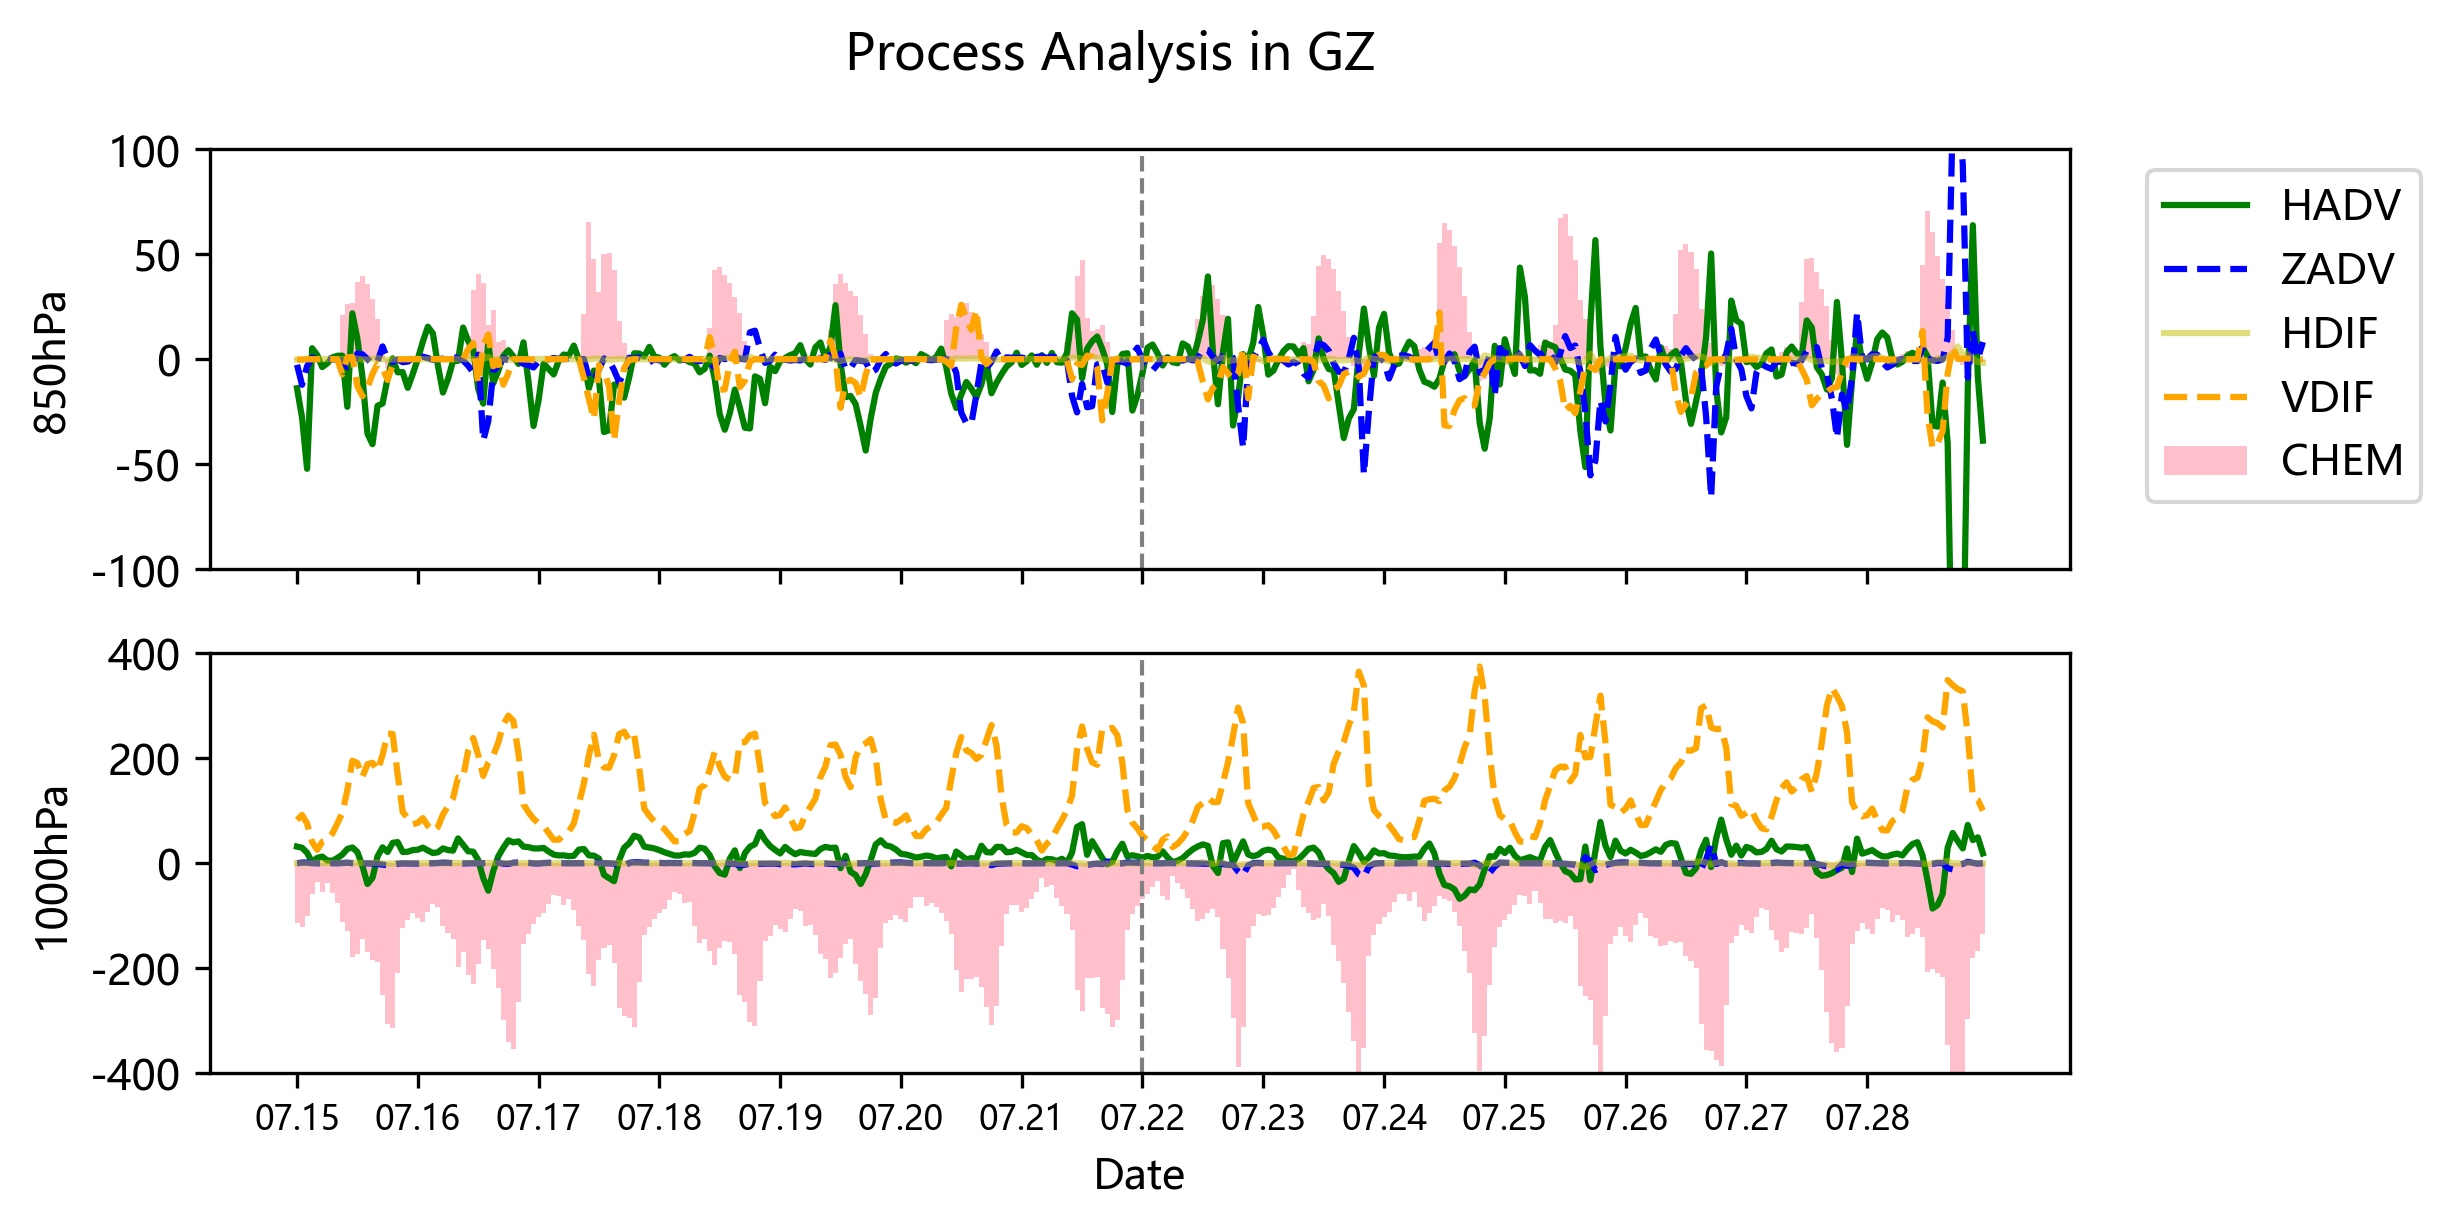

In [68]:
ts=np.arange(0,336)
fig=plt.figure(figsize=(8,4),dpi=300)
ax=fig.subplots(2,1)
b1=ax[1].plot(ts,HADV_gz,'-g',label='HADV')
b2=ax[1].plot(ts,ZADV_gz,'--b',label='ZADV')
b3=ax[1].plot(ts,HDIF_gz,linestyle='-',color='y',alpha=0.5,label='HDIF')
b4=ax[1].plot(ts,VDIF_gz,linestyle='--',color='orange',label='VDIF')
b5=ax[1].bar(ts,CHEM_gz,width=1,color='pink',label='CHEM')
# b6=ax[1].bar(ts,DDEP_gz,width=1,color='gray',label='DDEP')
ax[1].axvline(x=168,color='gray',linestyle='--',linewidth=1)

b1=ax[0].plot(ts,HADV_gzL2,'-g',label='HADV')
b2=ax[0].plot(ts,ZADV_gzL2,'--b',label='ZADV')
b3=ax[0].plot(ts,HDIF_gzL2,linestyle='-',color='y',alpha=0.5,label='HDIF')
b4=ax[0].plot(ts,VDIF_gzL2,linestyle='--',color='orange',label='VDIF')
b5=ax[0].bar(ts,CHEM_gzL2,width=1,color='pink',label='CHEM')
# b6=ax[0].bar(ts,DDEP_gzL2,width=1,color='gray',label='DDEP')
ax[0].axvline(x=168,color='gray',linestyle='--',linewidth=1)

ax[1].set_xlabel('Date')
ax[1].set_ylabel('1000hPa')
ax[0].set_ylabel('850hPa')
ax[1].set_xticks(np.arange(0,336,24))
ax[0].set_xticks(np.arange(0,336,24))
ax[1].set_xticklabels(['07.15','07.16','07.17','07.18','07.19','07.20','07.21','07.22','07.23','07.24','07.25','07.26','07.27','07.28'],size=8)
ax[0].set_xticklabels([])
ax[1].set_yticks(np.arange(-400,401,200))
ax[1].set_ylim([-400,400])
ax[0].set_yticks(np.arange(-100,101,50))
ax[0].set_ylim([-100,100])

ax[0].legend(bbox_to_anchor=(1.2,1))

plt.suptitle('Process Analysis in GZ')

plt.show()

### 2.清洁时段与污染时段平均相减

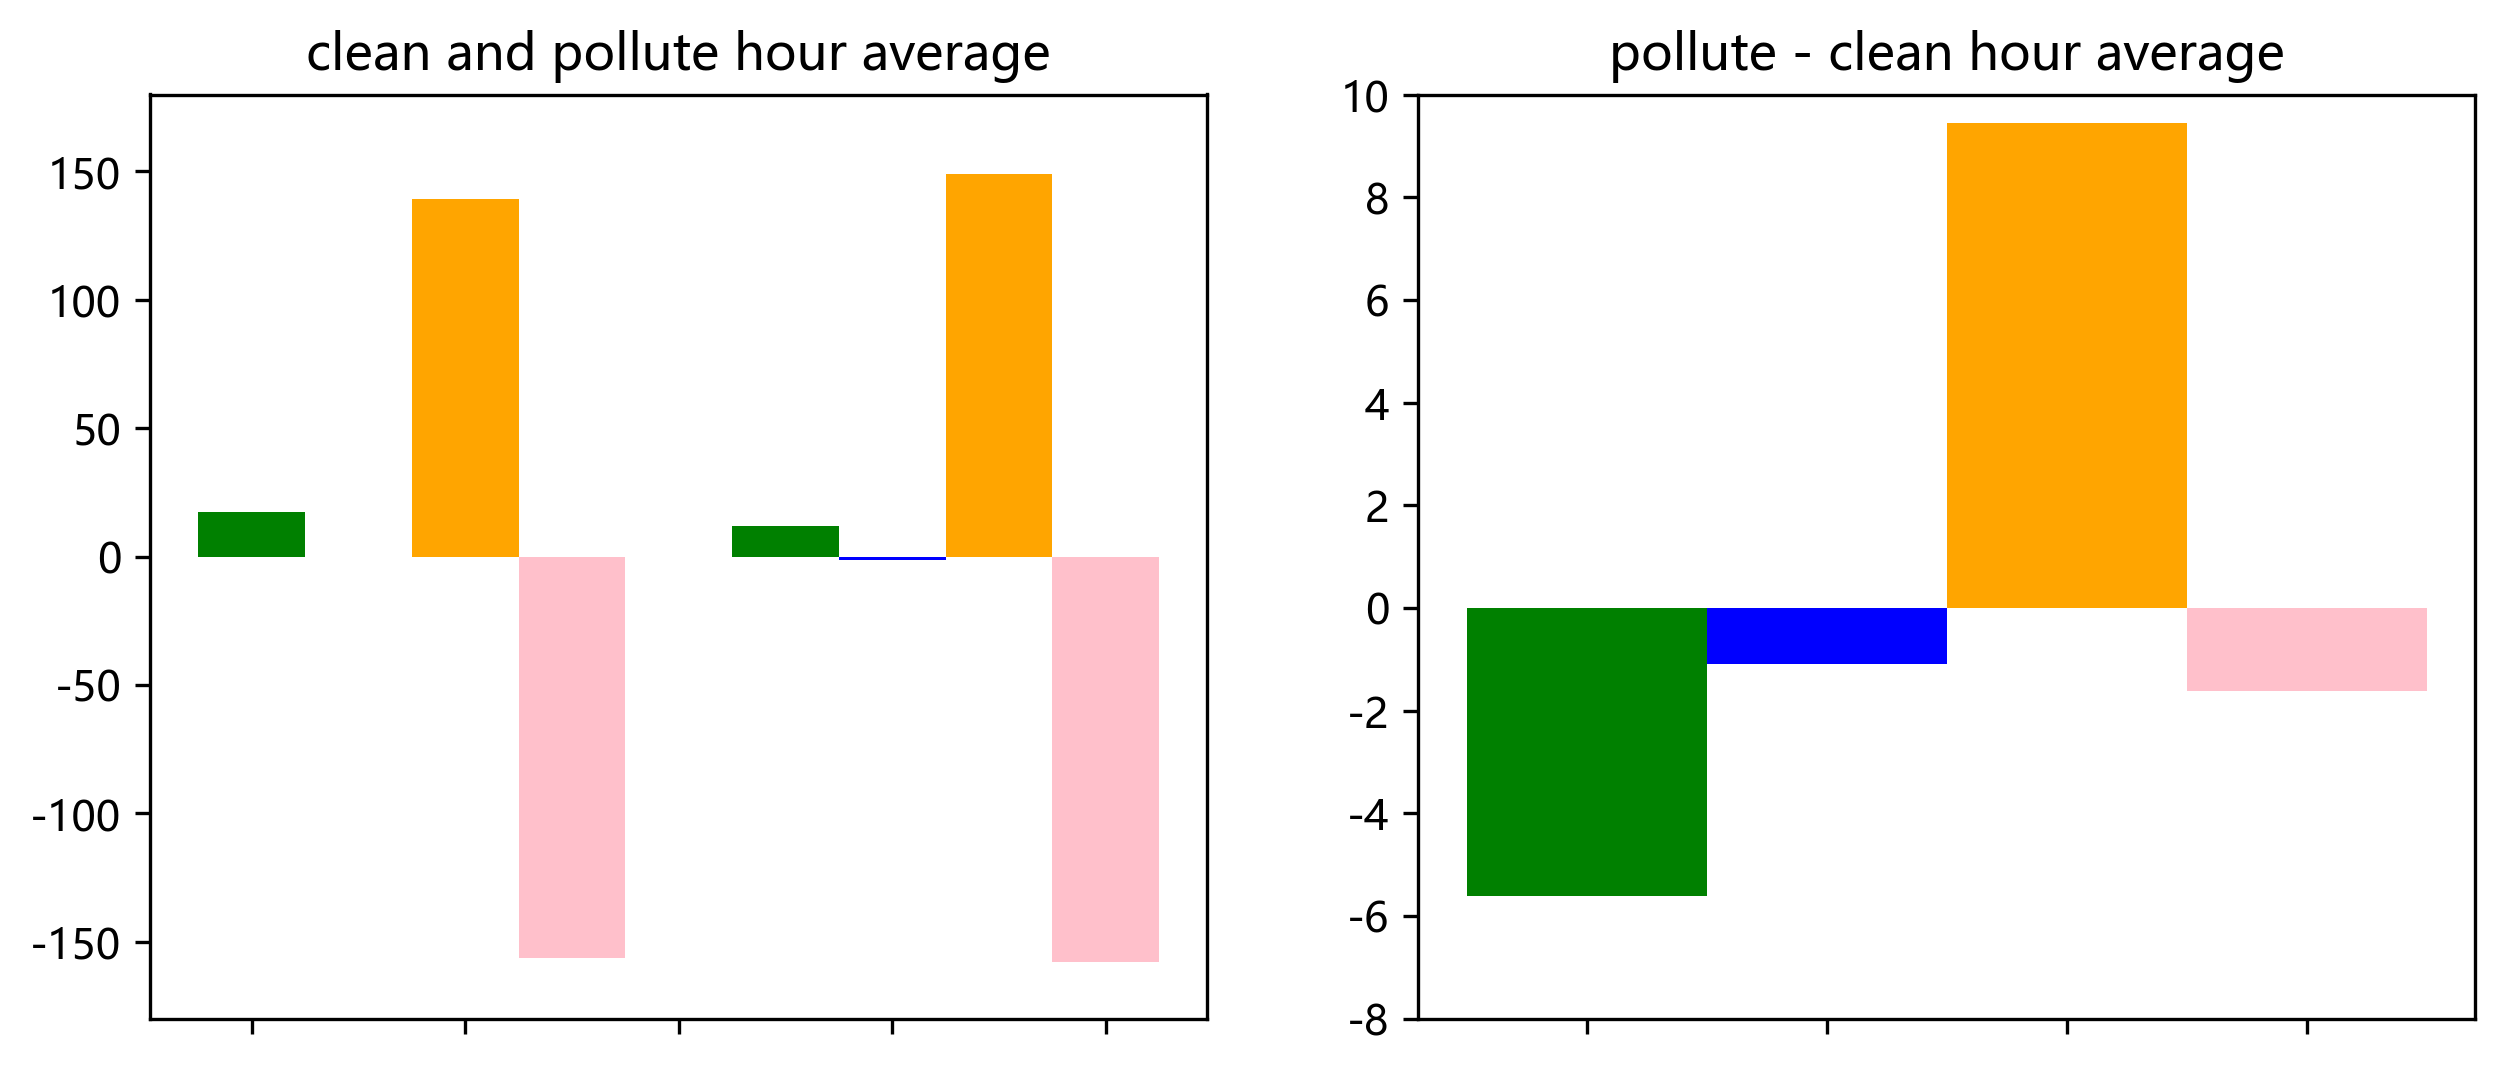

In [179]:
bstep=np.arange(0,4)
bstep2=np.arange(5,9)
barc=np.array([HADVc_gz,ZADVc_gz,VDIFc_gz,CHEMc_gz])
barp=np.array([HADVp_gz,ZADVp_gz,VDIFp_gz,CHEMp_gz])

fig=plt.figure(figsize=(10,4),dpi=300)
ax=fig.subplots(1,2)
colors=['green','b','orange','pink']
ax[0].bar(bstep,barc,width=1,color=colors)
ax[0].bar(bstep2,barp,width=1,color=colors)
ax[0].set_title('clean and pollute hour average')


ax[1].bar(bstep,np.array(barp)-np.array(barc),width=1,color=colors)
ax[1].set_title('pollute - clean hour average')

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
# ax[0].legend(bbox_to_anchor=(1.2,1))

ax[0].set_ylim(-180,180)
ax[1].set_ylim(-8,10)

plt.show()

### 3.空间场

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
import datetime

In [8]:
shp_GD=Reader('D:/files/Master/02学术/Boundary/地形边界/Gdbound/gdboudiv_arc.shp')
shp_HK=Reader('D:/files/Master/02学术/Boundary/行政边界/HK/HK.shp')
shp_MC=Reader('D:/files/Master/02学术/Boundary/行政边界/MC/MC.shp')

In [9]:
GridFile=nc.Dataset('F:/Data/caseGZ_2207/GRIDCRO2D_2022200.nc')
lat=np.squeeze(GridFile.variables['LAT'][:])
lon=np.squeeze(GridFile.variables['LON'][:])

In [10]:
def t2step(date: 'int',hour: 'int',start_date: 'int',end_date: 'int'):
    """
    convert time point wanted to time step in model data
    """
    delt=date-start_date
    tstep=delt*24+hour
    return(tstep)

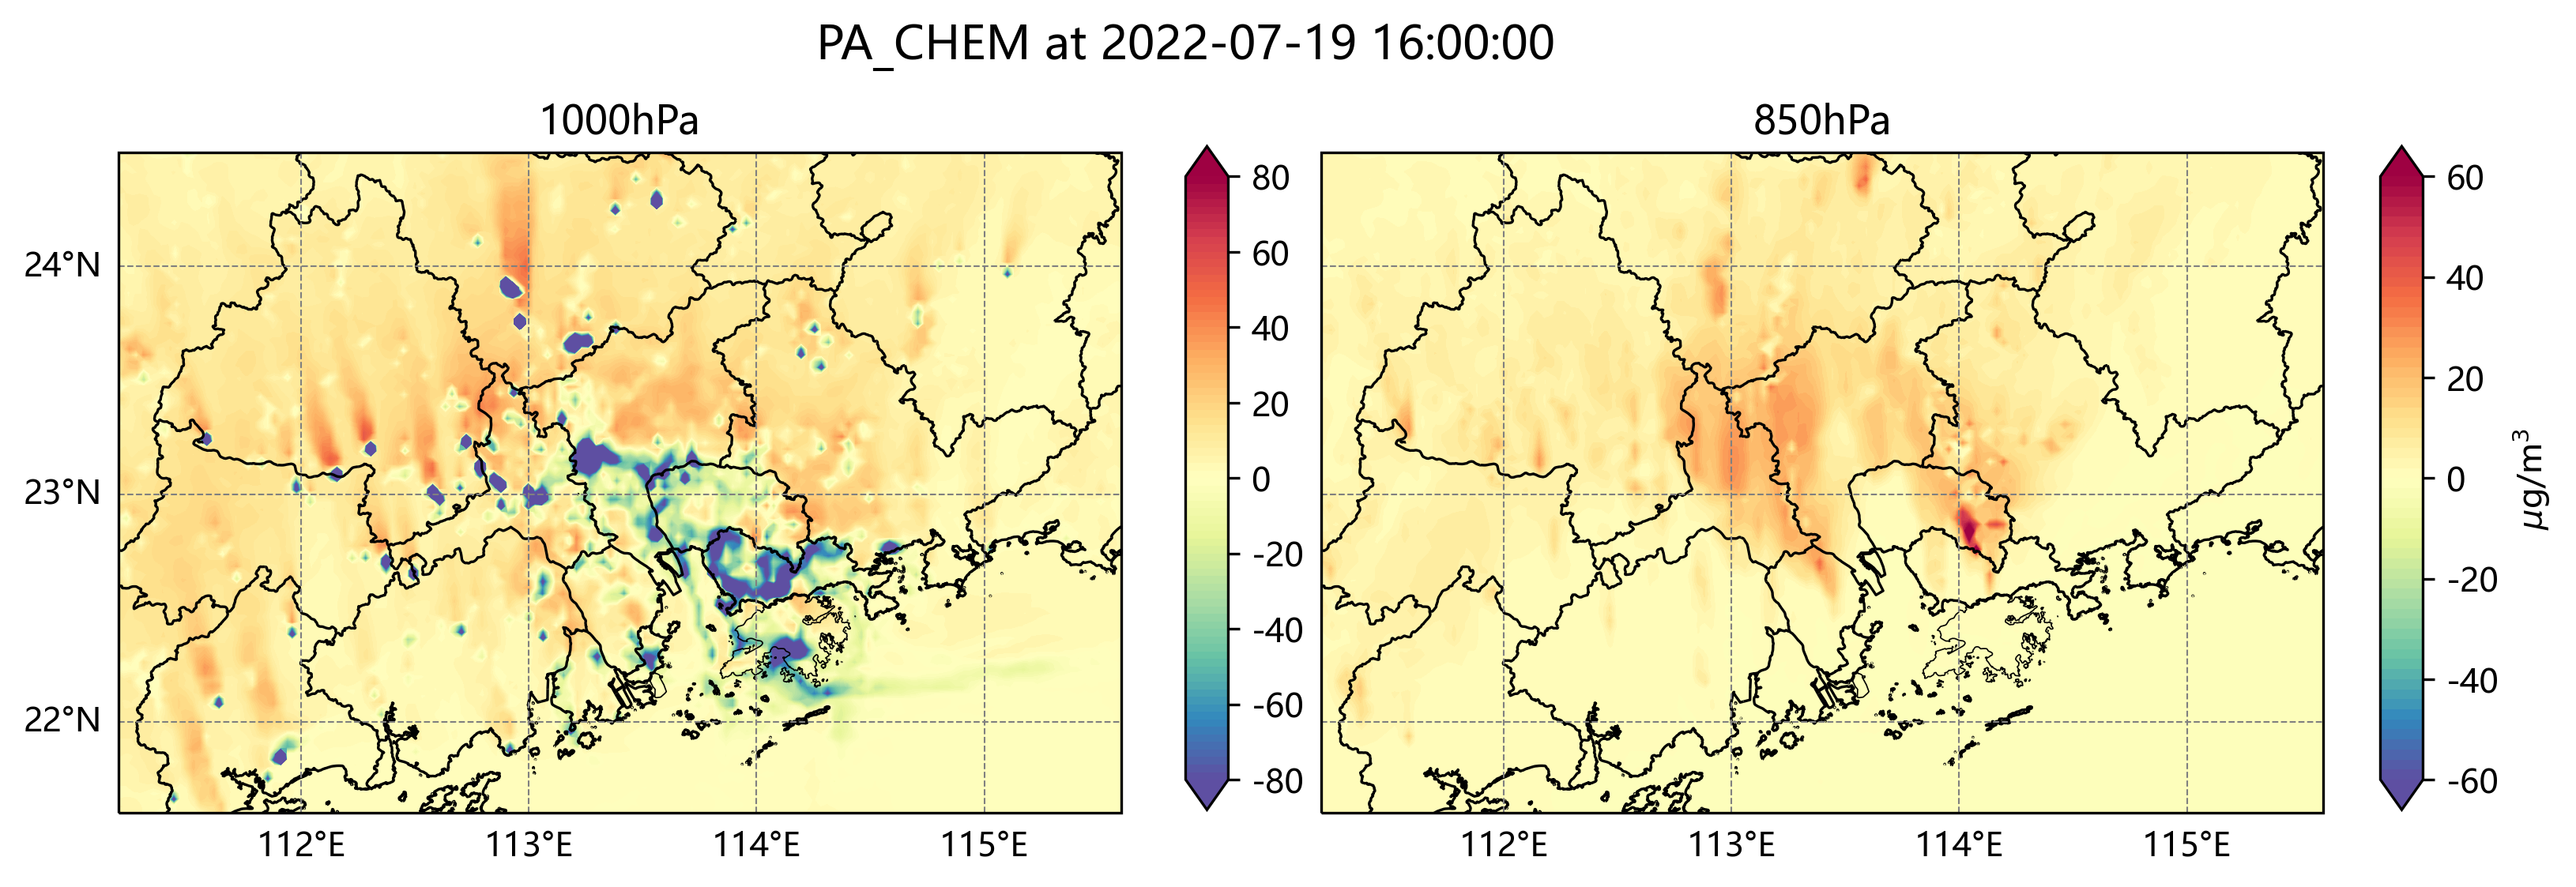

In [26]:
date=19
hour=16
tstep=t2step(date,hour,15,28)

cmax=81
cmin=-80
cmax2=61
cmin2=-60
cmaplevel1=np.arange(cmin,cmax,2)
cmaplevel2=np.arange(cmin2,cmax2,2)
proj_shp=ccrs.PlateCarree()
fig = plt.figure(figsize=(12,4),dpi=300)
ax = fig.subplots(1,2,subplot_kw={'projection':proj_shp})

# SHP Lines
for i in range(2):
    ax[i].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

    ax[i].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())

gl=ax[0].gridlines(
    xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
    draw_labels=True, x_inline=False, y_inline=False,
    linewidth=0.5, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

gl=ax[1].gridlines(
    xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
    draw_labels=True, x_inline=False, y_inline=False,
    linewidth=0.5, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.left_labels =False
gl.rotate_labels=False

# ----------------1000hPa----------------
# contour map
cmap1=ax[0].contourf(lon,lat,CHEM_L1[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel1,extend='both')

# ----------------850hPa----------------
# contour map
cmap2=ax[1].contourf(lon,lat,CHEM_L2[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel2,extend='both')

# colorbar
fig.subplots_adjust(right=0.9)
position= fig.add_axes([0.92,0.15,0.015,0.7])
cbar=fig.colorbar(cmap2,cax=position)
cbar.set_ticks(np.arange(cmin2,cmax2+1,20))
cbar.set_label('$\mu$g/m$^3$')

position= fig.add_axes([0.5,0.15,0.015,0.7])
cbar=fig.colorbar(cmap1,cax=position)
cbar.set_ticks(np.arange(cmin,cmax+1,20))
# cbar.set_label('$\mu$g/m$^3$')

# set titles
ax[0].set_title('1000hPa')
ax[1].set_title('850hPa')
plt.suptitle('PA_CHEM at '+str(datetime.datetime(2022,7,date,hour)),size=14)
plt.show()

In [11]:
date=np.arange(25,29,1)
hour=np.arange(0,24,1)

cmax=81
cmin=-80
cmax2=61
cmin2=-60
cmaplevel1=np.arange(cmin,cmax,2)
cmaplevel2=np.arange(cmin2,cmax2,1)
proj_shp=ccrs.PlateCarree()

for i in range(np.size(date)):
    for j in range(np.size(hour)):
        tstep=t2step(date[i],hour[j],15,28)

        fig = plt.figure(figsize=(12,4),dpi=300)
        ax = fig.subplots(1,2,subplot_kw={'projection':proj_shp})

        # SHP Lines
        for k in range(2):
            ax[k].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
            ax[k].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
            ax[k].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

            ax[k].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())

        gl=ax[0].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0.5, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False

        gl=ax[1].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0.5, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.left_labels =False
        gl.rotate_labels=False

        # ----------------1000hPa----------------
        # contour map
        cmap1=ax[0].contourf(lon,lat,HADV_L1[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel1,extend='both')

        # ----------------850hPa----------------
        # contour map
        cmap2=ax[1].contourf(lon,lat,HADV_L2[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel2,extend='both')

        # colorbar
        fig.subplots_adjust(right=0.9)
        position= fig.add_axes([0.92,0.15,0.015,0.7])
        cbar=fig.colorbar(cmap2,cax=position)
        cbar.set_ticks(np.arange(cmin2,cmax2+1,20))
        cbar.set_label('$\mu$g/m$^3$')

        position= fig.add_axes([0.5,0.15,0.015,0.7])
        cbar=fig.colorbar(cmap1,cax=position)
        cbar.set_ticks(np.arange(cmin,cmax+1,20))
        # cbar.set_label('$\mu$g/m$^3$')

        # set titles
        ax[0].set_title('1000hPa')
        ax[1].set_title('850hPa')
        plt.suptitle('PA_HADV at '+str(datetime.datetime(2022,7,date[i],hour[j])),size=14)

        figure_path='F:/Data/caseGZ_2207/Figure/PA_HADV_h/'
        plt.savefig(figure_path+str(datetime.date(2022,7,date[i]))+'_'+str(hour[j]).zfill(2)+'.png')
        print('Now printing '+str(datetime.datetime(2022,7,date[i],hour[j])))
print('Printing Completed!')
# plt.show()

Now printing 2022-07-25 00:00:00
Now printing 2022-07-25 01:00:00
Now printing 2022-07-25 02:00:00
Now printing 2022-07-25 03:00:00
Now printing 2022-07-25 04:00:00
Now printing 2022-07-25 05:00:00
Now printing 2022-07-25 06:00:00
Now printing 2022-07-25 07:00:00
Now printing 2022-07-25 08:00:00
Now printing 2022-07-25 09:00:00
Now printing 2022-07-25 10:00:00
Now printing 2022-07-25 11:00:00
Now printing 2022-07-25 12:00:00
Now printing 2022-07-25 13:00:00
Now printing 2022-07-25 14:00:00
Now printing 2022-07-25 15:00:00
Now printing 2022-07-25 16:00:00
Now printing 2022-07-25 17:00:00
Now printing 2022-07-25 18:00:00
Now printing 2022-07-25 19:00:00
Now printing 2022-07-25 20:00:00
Now printing 2022-07-25 21:00:00
Now printing 2022-07-25 22:00:00
Now printing 2022-07-25 23:00:00
Now printing 2022-07-26 00:00:00
Now printing 2022-07-26 01:00:00
Now printing 2022-07-26 02:00:00
Now printing 2022-07-26 03:00:00
Now printing 2022-07-26 04:00:00
Now printing 2022-07-26 05:00:00
Now printi

In [16]:
t2step(25,0,15,28)

240

In [18]:
HADV_L1_day19=np.sum(HADV_L1[96:120,:,:],0)
HADV_L1_day24=np.sum(HADV_L1[216:240,:,:],0)

HADV_L2_day19=np.sum(HADV_L2[96:120,:,:],0)
HADV_L2_day24=np.sum(HADV_L2[216:240,:,:],0)

HADV_L1_day19.shape

(110, 152)

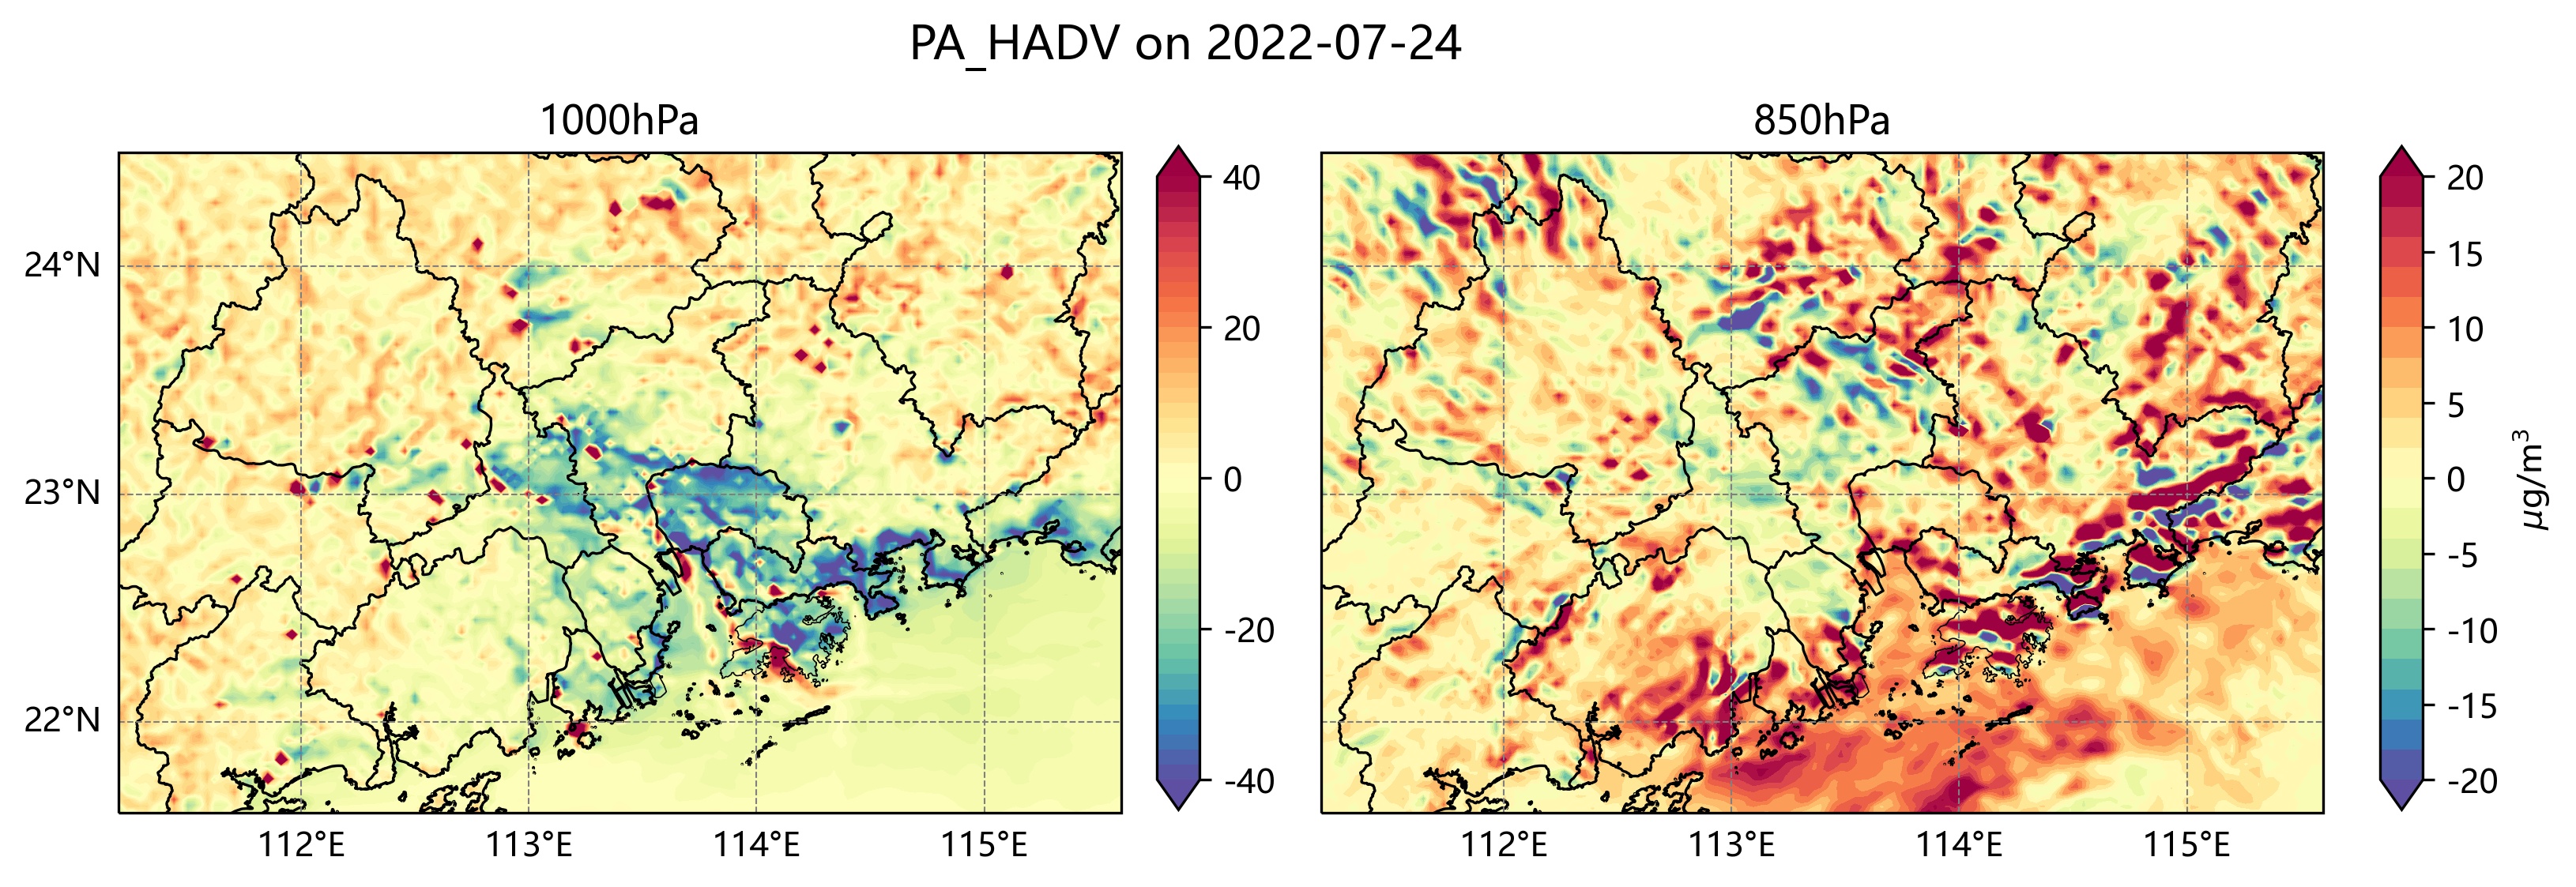

In [35]:
L1=HADV_L1_day24/24
L2=HADV_L2_day24/24

cmax=41
cmin=-40
cmax2=21
cmin2=-20
cmaplevel1=np.arange(cmin,cmax,2)
cmaplevel2=np.arange(cmin2,cmax2,2)
proj_shp=ccrs.PlateCarree()
fig = plt.figure(figsize=(12,4),dpi=300)
ax = fig.subplots(1,2,subplot_kw={'projection':proj_shp})

# SHP Lines
for i in range(2):
    ax[i].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

    ax[i].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())

gl=ax[0].gridlines(
    xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
    draw_labels=True, x_inline=False, y_inline=False,
    linewidth=0.5, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

gl=ax[1].gridlines(
    xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
    draw_labels=True, x_inline=False, y_inline=False,
    linewidth=0.5, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.left_labels =False
gl.rotate_labels=False

# ----------------1000hPa----------------
# contour map
cmap1=ax[0].contourf(lon,lat,L1,transform=proj_shp,cmap='Spectral_r',levels=cmaplevel1,extend='both')

# ----------------850hPa----------------
# contour map
cmap2=ax[1].contourf(lon,lat,L2,transform=proj_shp,cmap='Spectral_r',levels=cmaplevel2,extend='both')

# colorbar
fig.subplots_adjust(right=0.9)
position= fig.add_axes([0.92,0.15,0.015,0.7])
cbar=fig.colorbar(cmap2,cax=position)
cbar.set_ticks(np.arange(cmin2,cmax2+1,5))
cbar.set_label('$\mu$g/m$^3$')

position= fig.add_axes([0.49,0.15,0.015,0.7])
cbar=fig.colorbar(cmap1,cax=position)
cbar.set_ticks(np.arange(cmin,cmax+1,20))
# cbar.set_label('$\mu$g/m$^3$')

# set titles
ax[0].set_title('1000hPa')
ax[1].set_title('850hPa')
plt.suptitle('PA_HADV on '+str(datetime.date(2022,7,24)),size=14)
plt.show()